# QCTO - Workplace Module

### Project Title: Contaminated River Water Parameters Project
#### Done By: Carroll Tshabane

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

**Introduction:**

 Water pollution poses a significant threat to ecosystems and human health. Polluted water sources can lead to adverse health effects, disrupt local ecosystems, and hinder economic activities dependent on clean water. In Buenos Aires, the contamination of rivers can impact drinking water supplies, recreational activities, and agriculture.

 This project focuses on analyzing the physico-chemical parameters of a polluted river located in Buenos Aires, utilizing a dataset obtained from Kaggle. The significance of this work lies in its potential to inform water quality management and environmental policy, ultimately contributing to public health and ecological sustainability.

**Project Objectives**

1. Evaluate the current state of water quality by analyzing key physico-chemical parameters.
2. Investigate correlations between various parameters to identify potential pollution sources and their impact on water quality.
3. Test hypotheses related to the factors affecting water quality and determine their statistical significance.
4. Develop predictive models to forecast water quality under varying conditions, enabling better resource management.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>


* **Data Source:** The dataset used in this project, titled "River Water Parameters," was sourced from Kaggle (https://www.kaggle.com/datasets/natanaelferran/river-water-parameters?select=River+water+parameters.csv).

 The data was collected through standardized sampling methods at various points along the river. Measurements were recorded for different physico-chemical parameters, ensuring a comprehensive assessment of water quality.


* **Size:** The dataset consists of 219 entries, capturing a range of water quality measurements over a specified period.

* **Scope:** It includes various physico-chemical parameters, such as temperature, pH, turbidity, dissolved oxygen, and hardness, which are crucial for assessing water quality.
* **Data Types:** The dataset features a mix of numerical (e.g., temperature, pH values) and categorical (e.g., sampling points, hardness classifications) data.
Methods of Collection

---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
contamination_df = pd.read_excel('/content/drive/MyDrive/Assignment/Contamination.xlsx')

# Display the first few rows
contamination_df.head()


,dateddmmyyyy,time24hrsxxxx,samplingpoint,ambienttemperaturec,ambienthumidity,sampletemperaturec,ph,EC\n(µS/cm,TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.200001,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.900002,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.700001,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.600000,196.0,SEMIDURA,117.0


In [ ]:
# The copy of the dataframe
contamination_copy_df = contamination_df.copy()

In [ ]:
# The copy of the dataframe
contamination_copy_df.shape


(219, 16)

In [ ]:
contamination_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     219 non-null    object 
 1   Time                     219 non-null    object 
 2   Sampling_Point           219 non-null    object 
 3   Ambient_Temperature_C    219 non-null    float64
 4   Ambient_Humidity         219 non-null    float64
 5   Sample_Temperature_C     219 non-null    float64
 6   pH                       219 non-null    float64
 7   EC_uS_cm                 219 non-null    int64  
 8   TDS_mg_L                 219 non-null    int64  
 9   TSS_mL_sed_L             213 non-null    float64
 10  DO_mg_L                  219 non-null    float64
 11  Level_cm                 180 non-null    float64
 12  Turbidity_NTU            218 non-null    float64
 13  Hardness_mg_CaCO3_L      217 non-null    float64
 14  Hardness_Classification  2

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [ ]:
# Standardize column names

contamination_copy_df.columns = [
    'Date', 'Time', 'Sampling_Point', 'Ambient_Temperature_C', 'Ambient_Humidity',
    'Sample_Temperature_C', 'pH', 'EC_uS_cm', 'TDS_mg_L', 'TSS_mL_sed_L',
    'DO_mg_L', 'Level_cm', 'Turbidity_NTU', 'Hardness_mg_CaCO3_L',
    'Hardness_Classification', 'Total_Cl_mg_L'
]

In [ ]:
# Fill missing values for categorical data with the most frequent value

contamination_copy_df['TSS_mL_sed_L'].fillna(contamination_copy_df['TSS_mL_sed_L'].median(), inplace=True)
contamination_copy_df['Level_cm'].fillna(contamination_copy_df['Level_cm'].median(), inplace=True)
contamination_copy_df['Turbidity_NTU'].fillna(contamination_copy_df['Turbidity_NTU'].median(), inplace=True)
contamination_copy_df['Hardness_mg_CaCO3_L'].fillna(contamination_copy_df['Hardness_mg_CaCO3_L'].median(), inplace=True)
contamination_copy_df['Total_Cl_mg_L'].fillna(contamination_copy_df['Total_Cl_mg_L'].median(), inplace=True)


In [ ]:
# Convert date and time columns to appropriate datetime format

# Step 3: Convert date and time columns to appropriate datetime format
# Ensure the Time column is of string type, then keep only the HH:MM portion
contamination_copy_df['Time'] = contamination_copy_df['Time'].astype(str).str[:5]
contamination_copy_df['Date'] = pd.to_datetime(contamination_copy_df['Date'], format='%d/%m/%Y')
contamination_copy_df['Time'] = pd.to_datetime(contamination_copy_df['Time'], format='%H:%M').dt.time

In [ ]:
# Step 4: Verify the cleaned dataset
print(contamination_copy_df.info())
print(contamination_copy_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     219 non-null    datetime64[ns]
 1   Time                     219 non-null    object        
 2   Sampling_Point           219 non-null    object        
 3   Ambient_Temperature_C    219 non-null    float64       
 4   Ambient_Humidity         219 non-null    float64       
 5   Sample_Temperature_C     219 non-null    float64       
 6   pH                       219 non-null    float64       
 7   EC_uS_cm                 219 non-null    int64         
 8   TDS_mg_L                 219 non-null    int64         
 9   TSS_mL_sed_L             219 non-null    float64       
 10  DO_mg_L                  219 non-null    float64       
 11  Level_cm                 219 non-null    float64       
 12  Turbidity_NTU            219 non-nul

In [ ]:
# Step 1: Handle missing values for 'Hardness_Classification'
contamination_copy_df['Hardness_Classification'].fillna(contamination_copy_df['Hardness_Classification'].mode()[0], inplace=True)


In [ ]:
#  Standardize categorical values - Convert to uppercase to maintain consistency
contamination_copy_df['Hardness_Classification'] = contamination_copy_df['Hardness_Classification'].str.upper()


In [ ]:
# Detect and treat potential outliers
# Step 3: Detect and treat potential outliers for numeric columns only
numeric_columns = contamination_copy_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 and Q3 for numeric columns
Q1 = contamination_copy_df[numeric_columns].quantile(0.25)
Q3 = contamination_copy_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers based on the IQR
outliers = contamination_copy_df[((contamination_copy_df[numeric_columns] < (Q1 - 1.5 * IQR)) |
                                  (contamination_copy_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Potential outliers detected:")
print(outliers)



Potential outliers detected:
          Date      Time     Sampling_Point  Ambient_Temperature_C  \
19  2023-06-26  14:15:00      Puente Bilbao              18.200001   
20  2023-06-26  14:15:00      Puente Bilbao              18.200001   
32  2023-06-28  13:45:00  Arroyo_Las Torres              14.400000   
39  2023-07-05  15:15:00      Puente Bilbao              18.000000   
40  2023-07-05  15:15:00      Puente Bilbao              18.000000   
42  2023-07-05  15:35:00  Arroyo_Las Torres              18.000000   
59  2023-08-02  14:10:00      Puente Bilbao              26.000000   
60  2023-08-02  14:10:00      Puente Bilbao              26.000000   
62  2023-08-02  14:25:00  Arroyo_Las Torres              26.000000   
69  2023-08-08  14:30:00      Puente Bilbao              13.400000   
70  2023-08-08  14:30:00      Puente Bilbao              13.400000   
72  2023-08-08  14:45:00  Arroyo_Las Torres              13.400000   
79  2023-08-15  14:40:00      Puente Bilbao              23.0

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summary Statistics
summary_stats = contamination_copy_df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                                Date  Ambient_Temperature_C  Ambient_Humidity  \
count                            219             219.000000        219.000000   
mean   2023-09-02 01:32:03.287671296              17.640183          0.559954   
min              2023-05-09 00:00:00              10.400000          0.190000   
25%              2023-07-07 00:00:00              13.800000          0.470000   
50%              2023-09-05 00:00:00              17.000000          0.540000   
75%              2023-10-17 00:00:00              20.000000          0.690000   
max              2023-11-28 00:00:00              30.500000          0.870000   
std                              NaN               5.163842          0.165303   

       Sample_Temperature_C          pH     EC_uS_cm    TDS_mg_L  \
count            219.000000  219.000000   219.000000  219.000000   
mean              19.594977    8.031507  1264.566210  624.246575   
min               12.800000    7.200000   200.

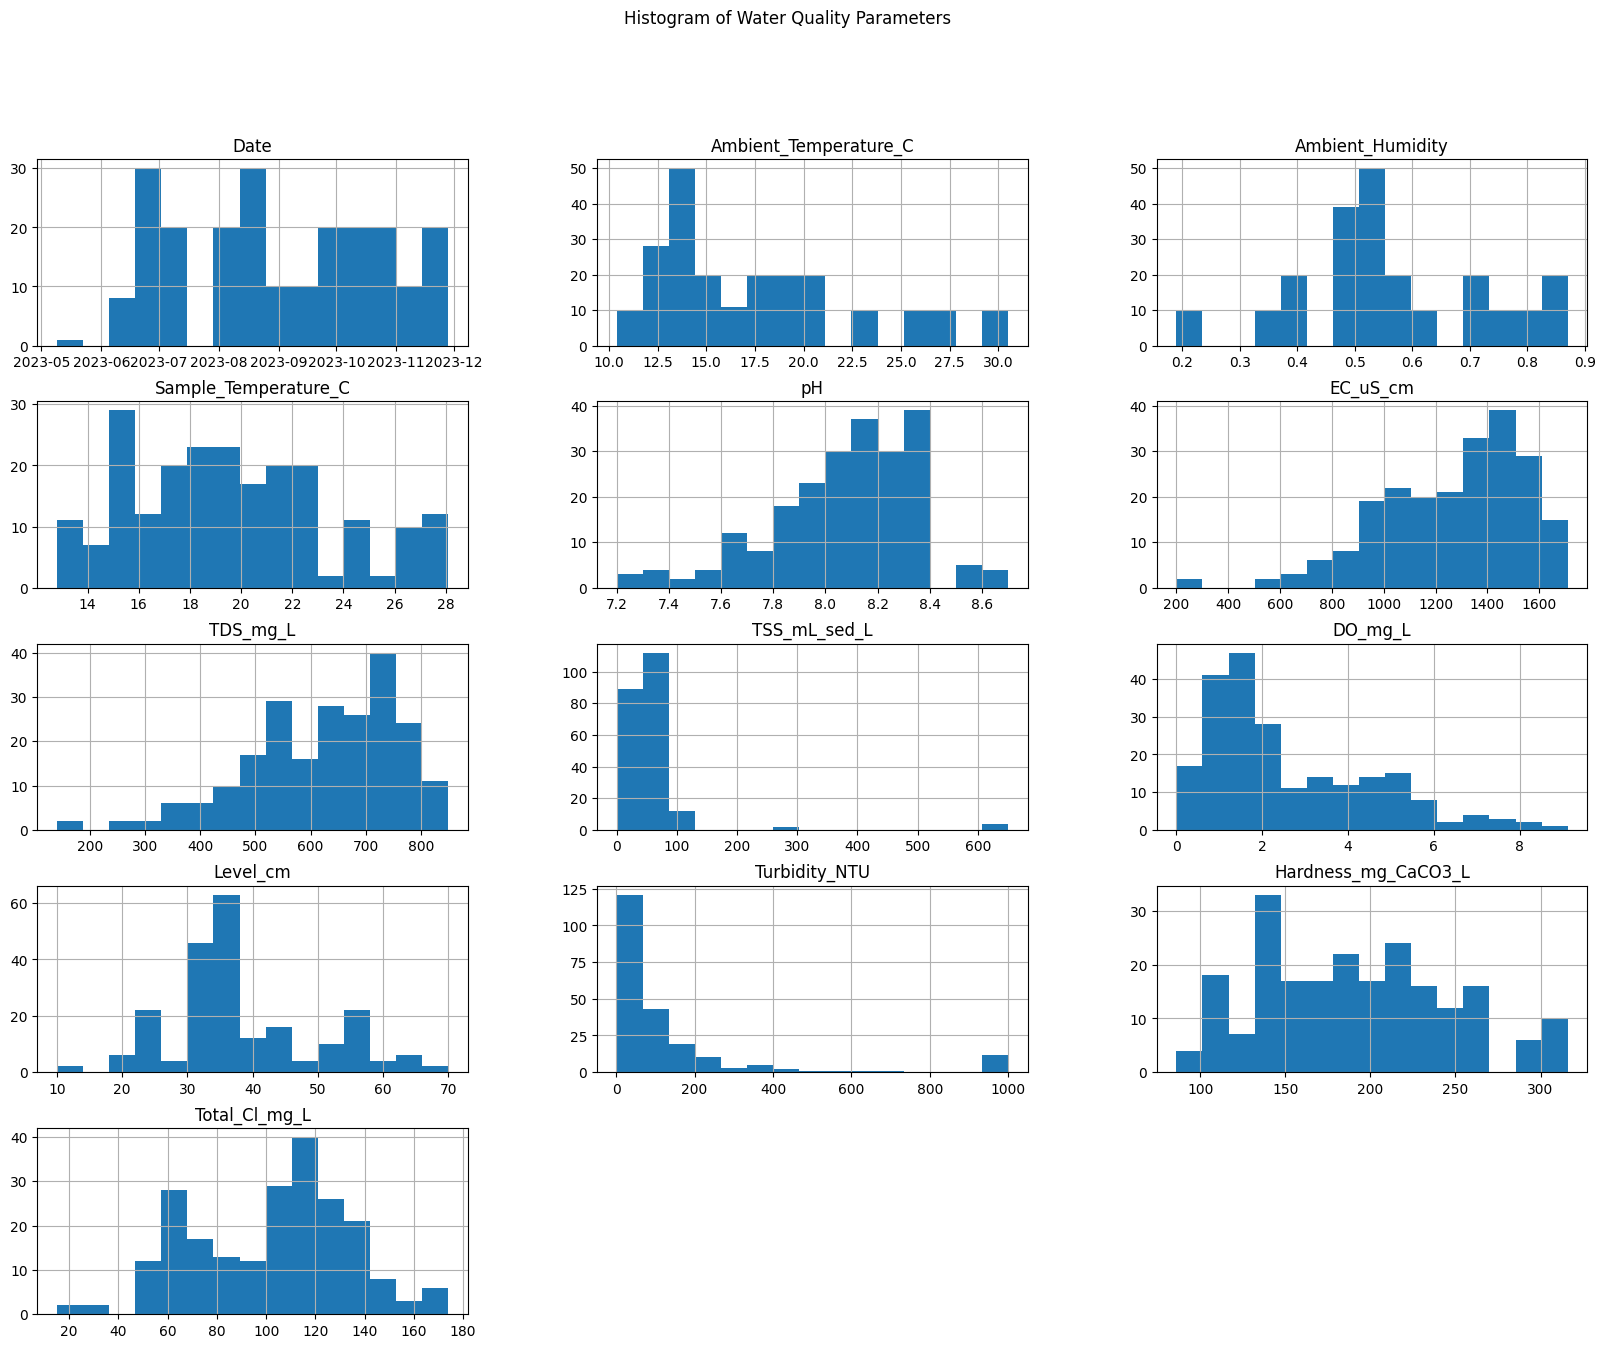

In [ ]:
# Step 2: Visualize Distributions
# Histogram of numeric features
contamination_copy_df.hist(bins=15, figsize=(20, 15), layout=(5, 3))
plt.suptitle('Histogram of Water Quality Parameters')
plt.show()

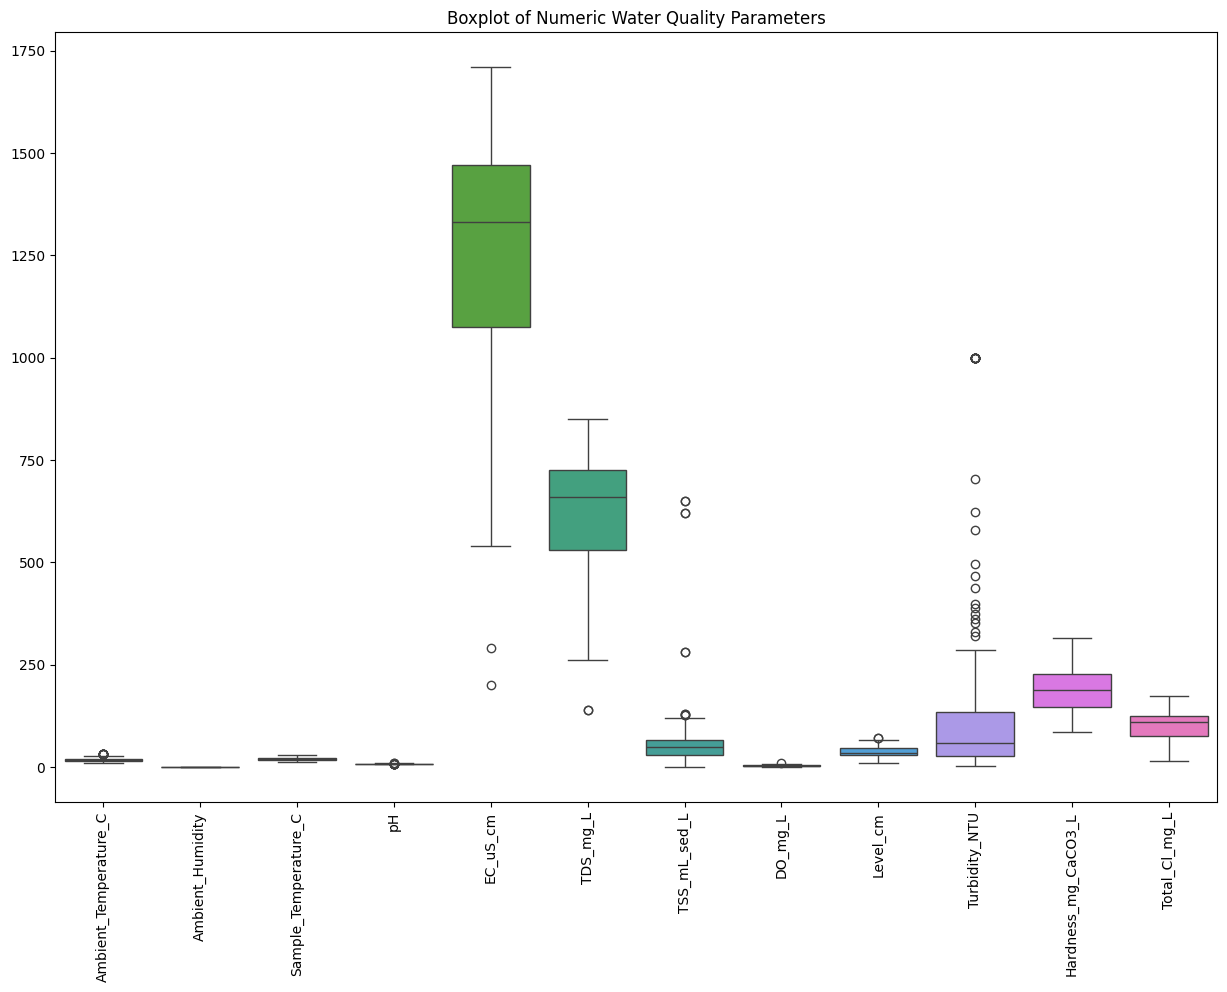

In [ ]:
# Boxplot for detecting outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=contamination_copy_df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Water Quality Parameters')
plt.show()

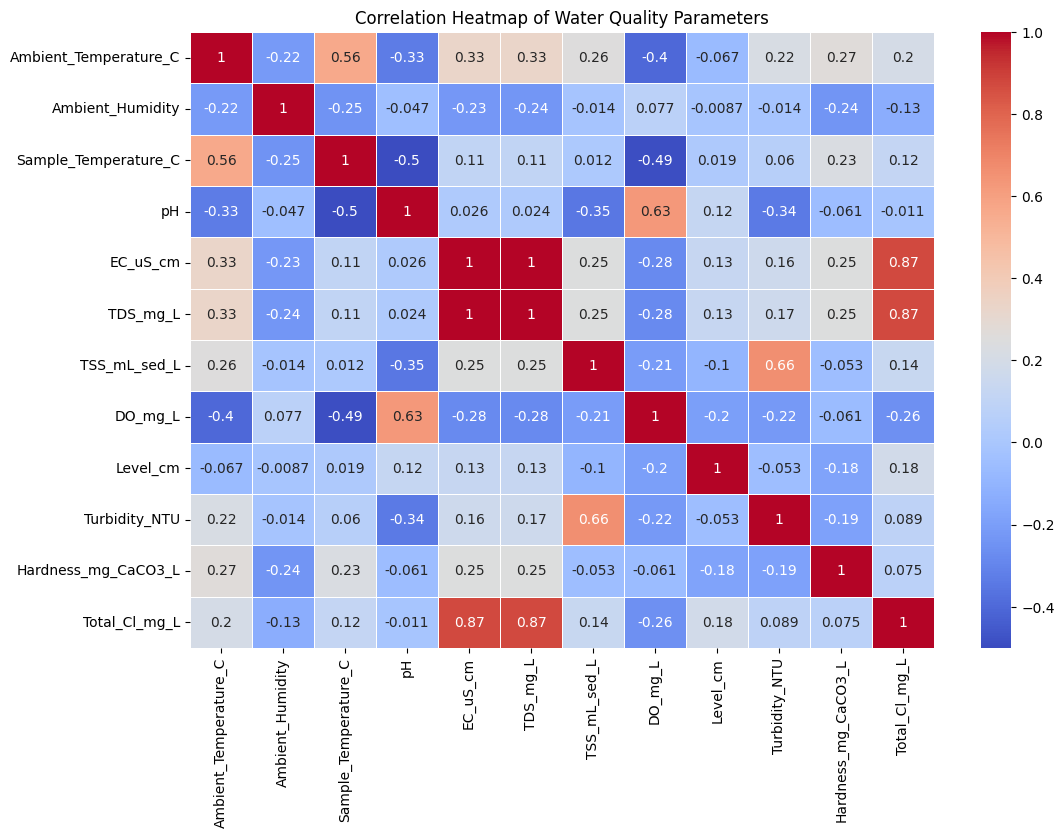

In [ ]:
# Step 3: Correlation Analysis
plt.figure(figsize=(12, 8))

# Selecting only numeric columns for correlation calculation
numeric_columns = contamination_copy_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()


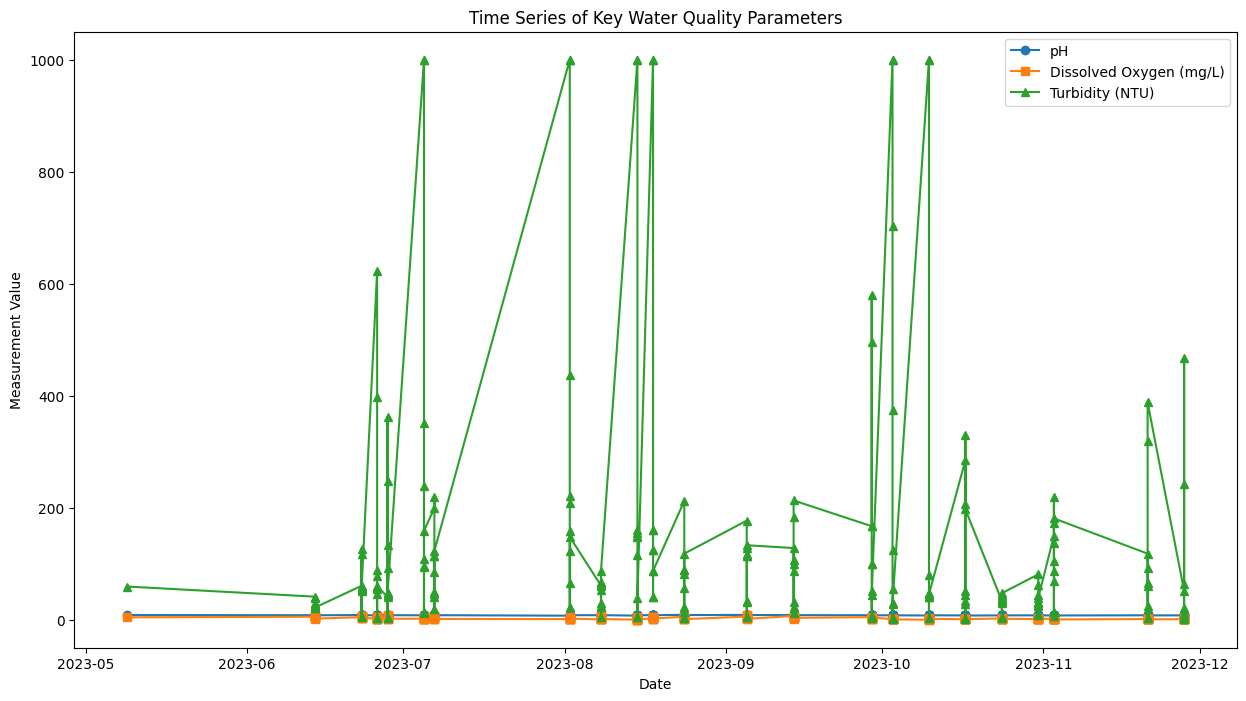

In [ ]:
# Step 4: Time Series Analysis
# Plot key parameters over time
plt.figure(figsize=(15, 8))
plt.plot(contamination_copy_df['Date'], contamination_copy_df['pH'], label='pH', marker='o')
plt.plot(contamination_copy_df['Date'], contamination_copy_df['DO_mg_L'], label='Dissolved Oxygen (mg/L)', marker='s')
plt.plot(contamination_copy_df['Date'], contamination_copy_df['Turbidity_NTU'], label='Turbidity (NTU)', marker='^')
plt.xlabel('Date')
plt.ylabel('Measurement Value')
plt.legend()
plt.title('Time Series of Key Water Quality Parameters')
plt.show()

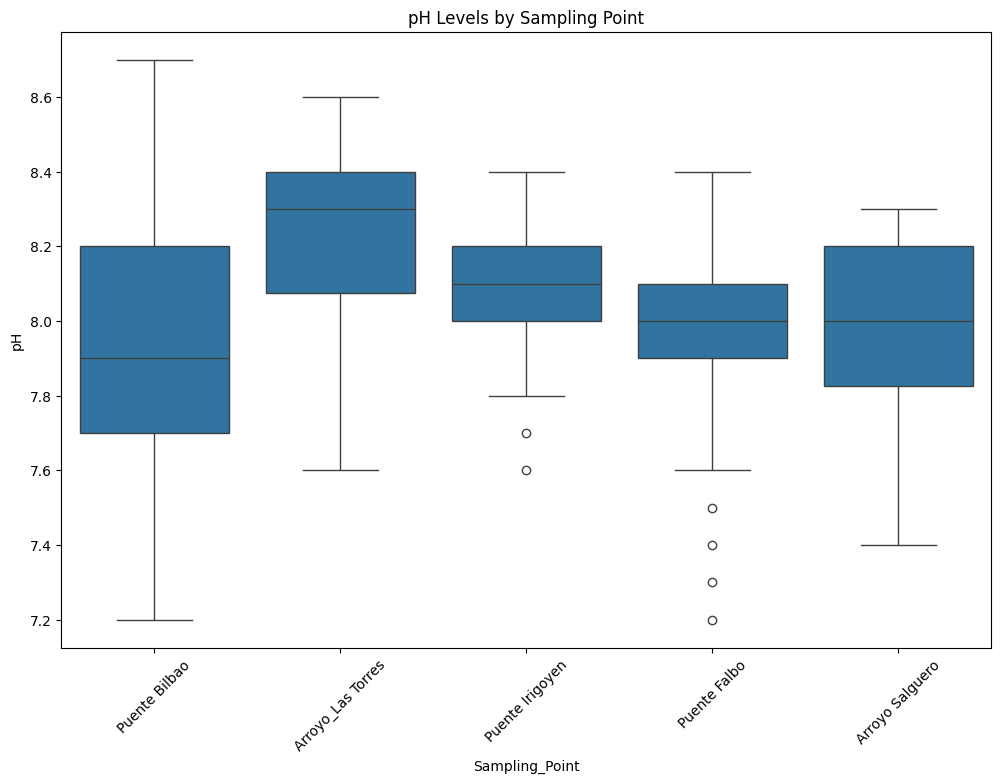

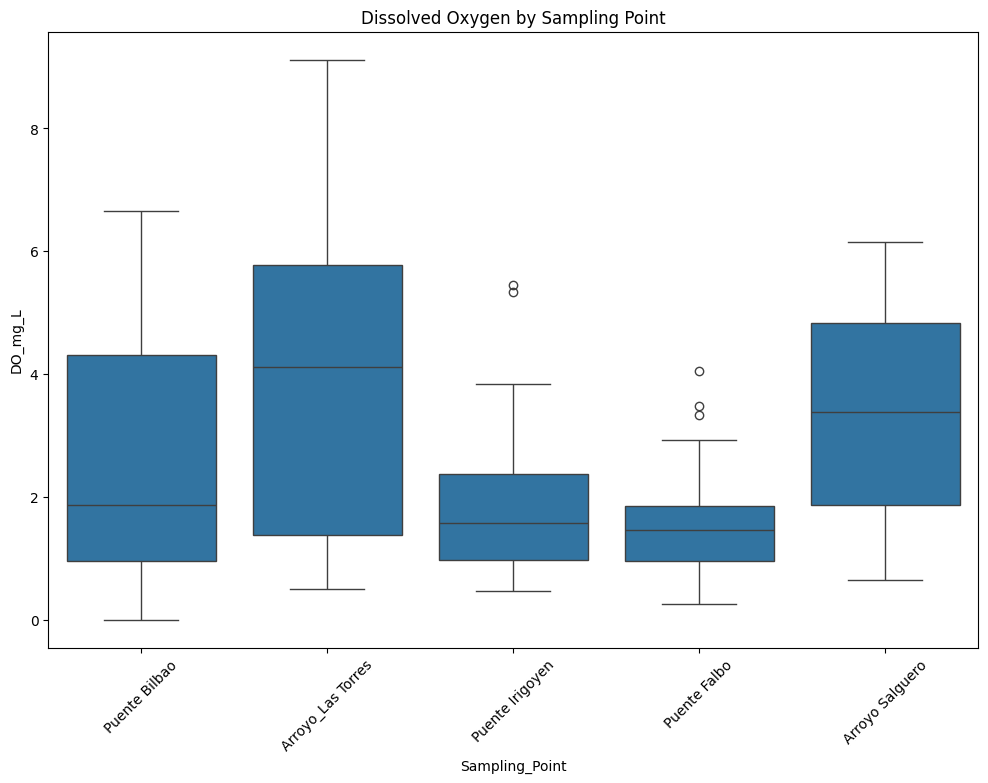

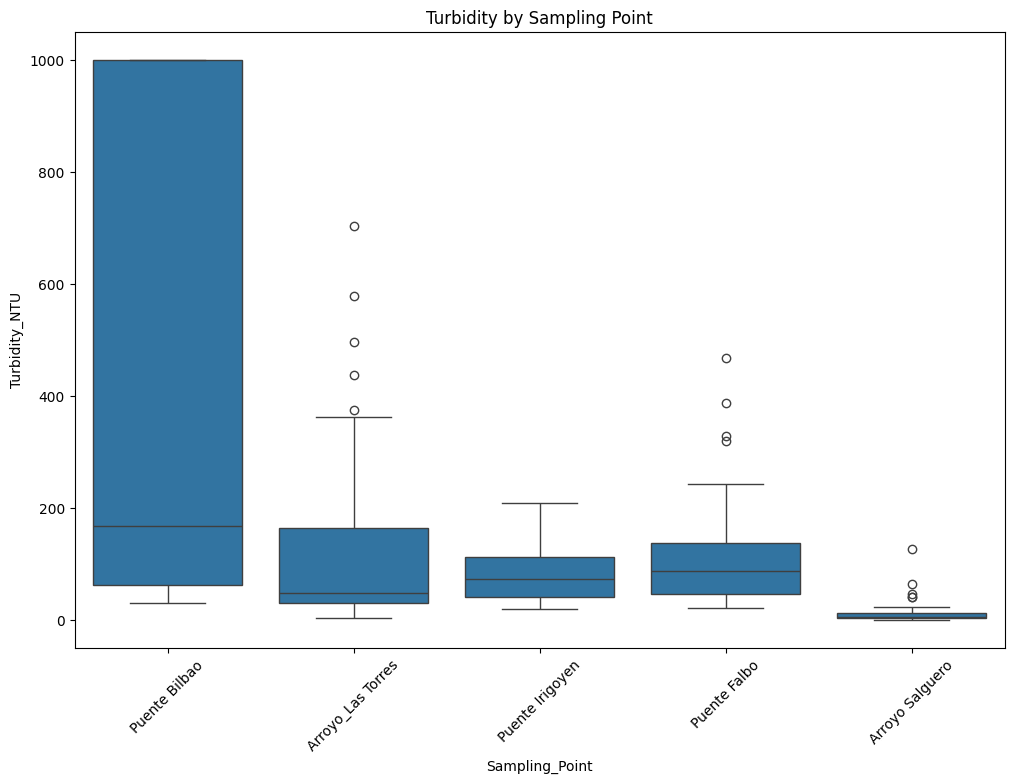

In [ ]:
# Step 5: Comparing Sampling Points
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sampling_Point', y='pH', data=contamination_copy_df)
plt.title('pH Levels by Sampling Point')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Sampling_Point', y='DO_mg_L', data=contamination_copy_df)
plt.title('Dissolved Oxygen by Sampling Point')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Sampling_Point', y='Turbidity_NTU', data=contamination_copy_df)
plt.title('Turbidity by Sampling Point')
plt.xticks(rotation=45)
plt.show()

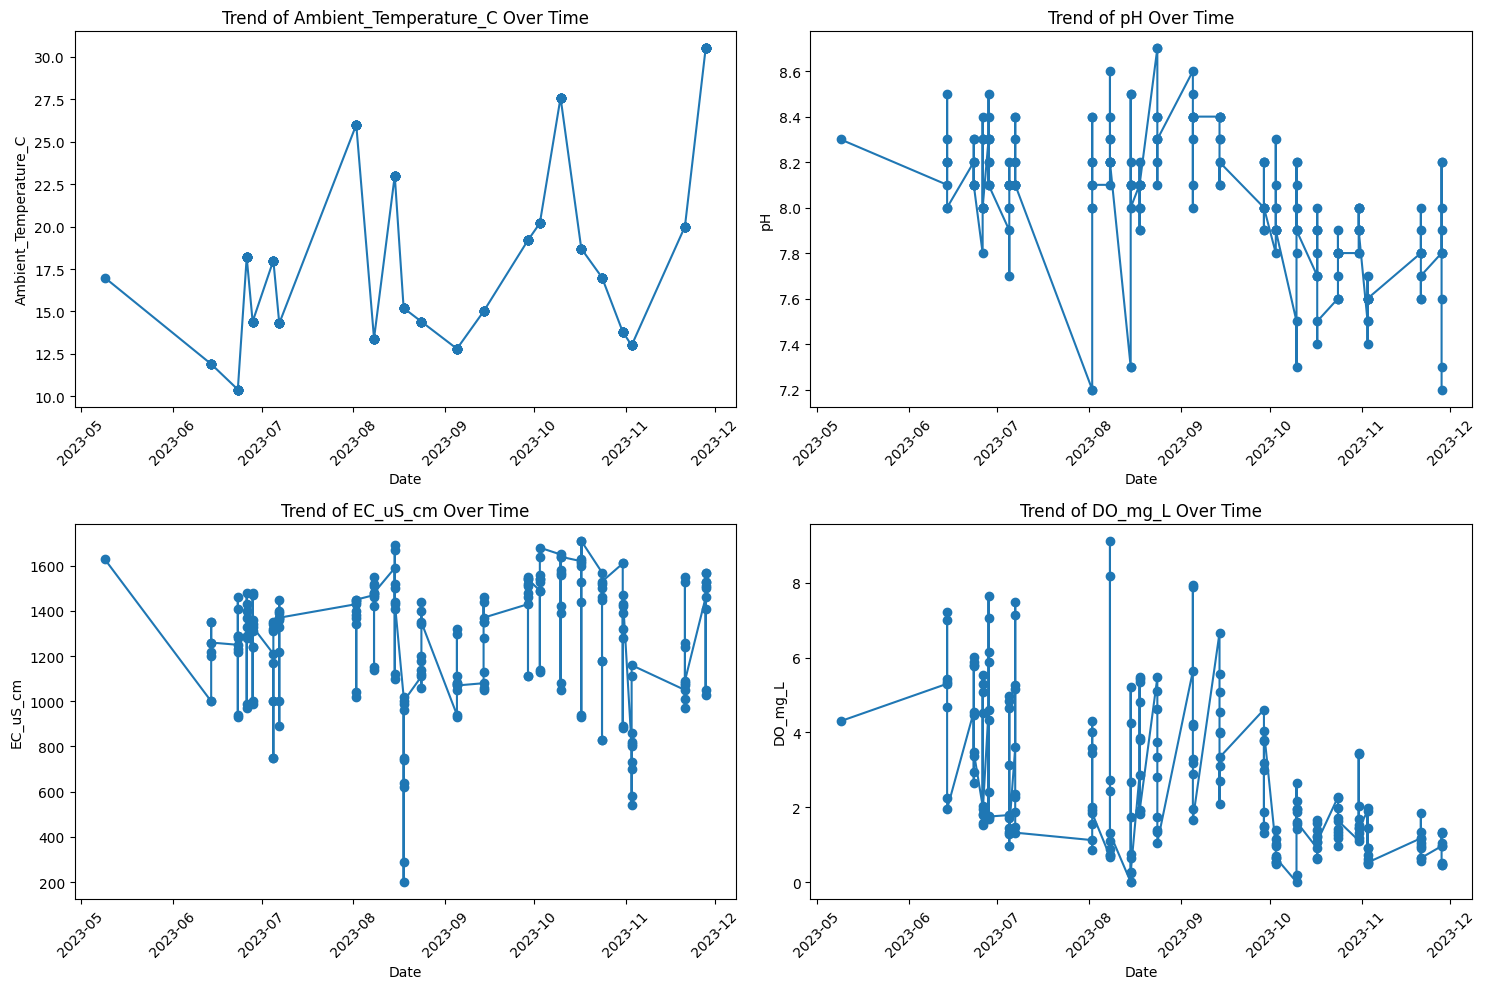

In [ ]:
# Step 4: Line Plots for Trends Over Time
plt.figure(figsize=(15, 10))

# List of parameters to plot
parameters_to_plot = ['Ambient_Temperature_C', 'pH', 'EC_uS_cm', 'DO_mg_L']

for i, parameter in enumerate(parameters_to_plot):
    plt.subplot(2, 2, i+1)
    plt.plot(contamination_copy_df['Date'], contamination_copy_df[parameter], marker='o')
    plt.title(f'Trend of {parameter} Over Time')
    plt.xlabel('Date')
    plt.ylabel(parameter)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


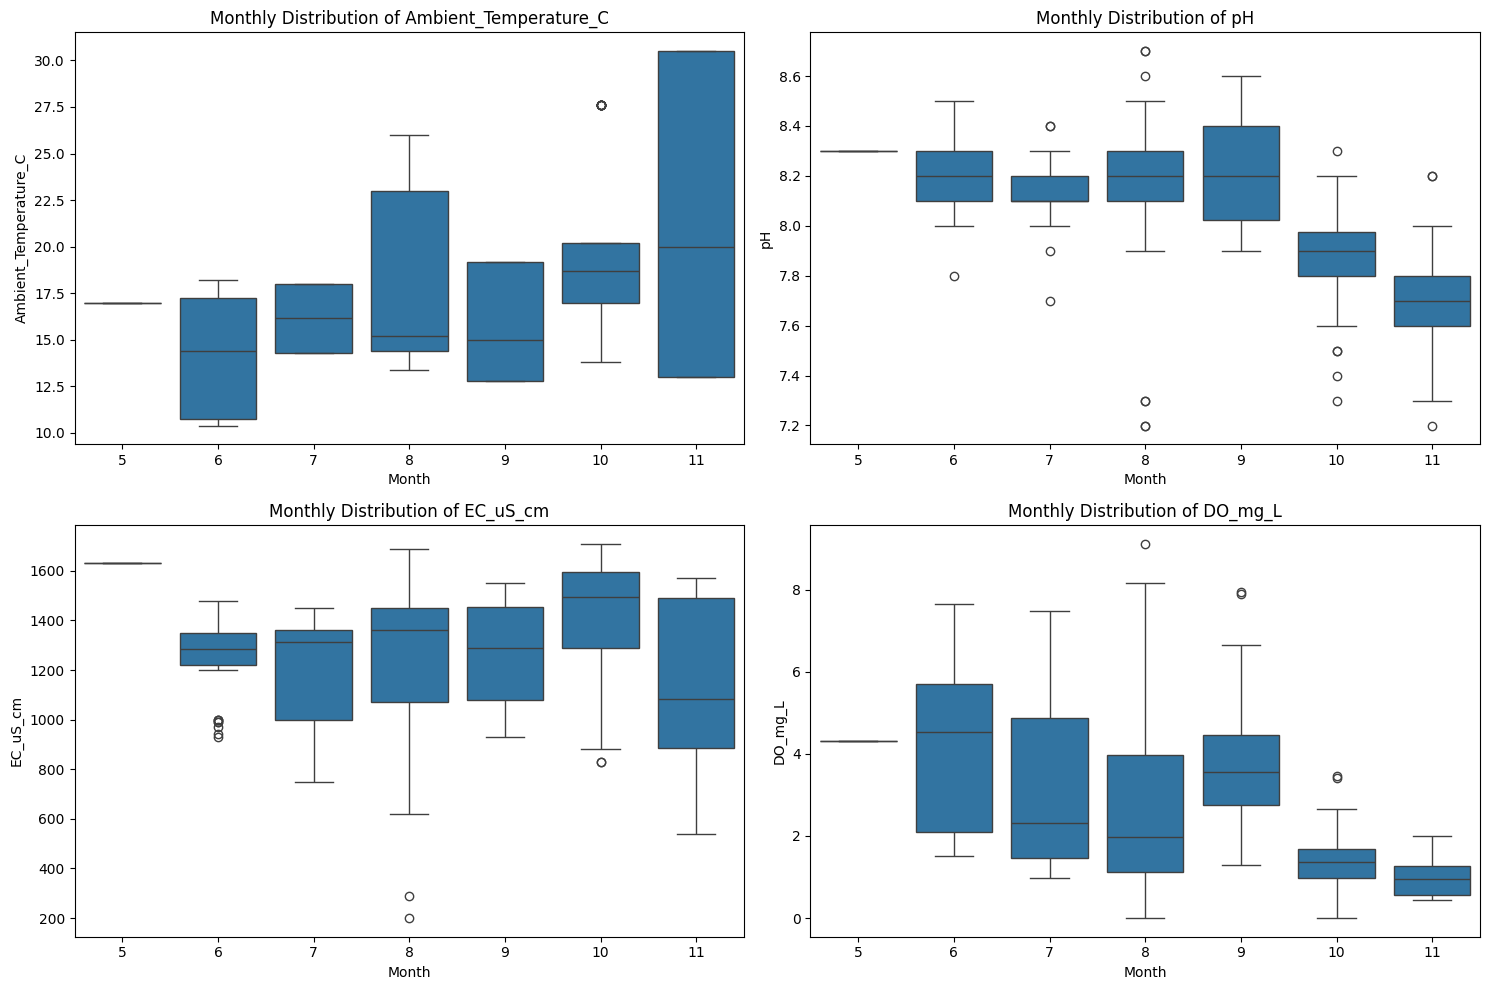

In [ ]:
# Step 5: Box Plots for Monthly Patterns
contamination_copy_df['Month'] = contamination_copy_df['Date'].dt.month

plt.figure(figsize=(15, 10))

# List of parameters to box plot by month
parameters_to_box_plot = ['Ambient_Temperature_C', 'pH', 'EC_uS_cm', 'DO_mg_L']

for i, parameter in enumerate(parameters_to_box_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Month', y=parameter, data=contamination_copy_df)
    plt.title(f'Monthly Distribution of {parameter}')
    plt.xlabel('Month')
    plt.ylabel(parameter)

plt.tight_layout()
plt.show()


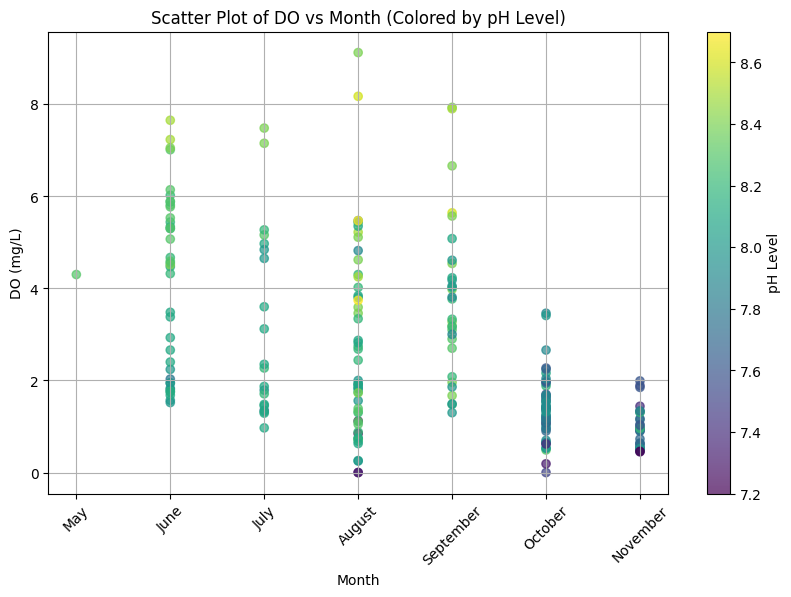

In [ ]:
# Step 1: Create a new column for the month names
contamination_copy_df['Month_Name'] = contamination_copy_df['Date'].dt.month_name()

# Step 2: Create the scatter plot using Month Names
plt.figure(figsize=(10, 6))
plt.scatter(contamination_copy_df['Month_Name'], contamination_copy_df['DO_mg_L'],
            c=contamination_copy_df['pH'], cmap='viridis', alpha=0.7)
plt.colorbar(label='pH Level')
plt.title('Scatter Plot of DO vs Month (Colored by pH Level)')
plt.xlabel('Month')
plt.ylabel('DO (mg/L)')
plt.xticks(rotation=45)  # Rotate month names for better visibility
plt.grid()
plt.show()


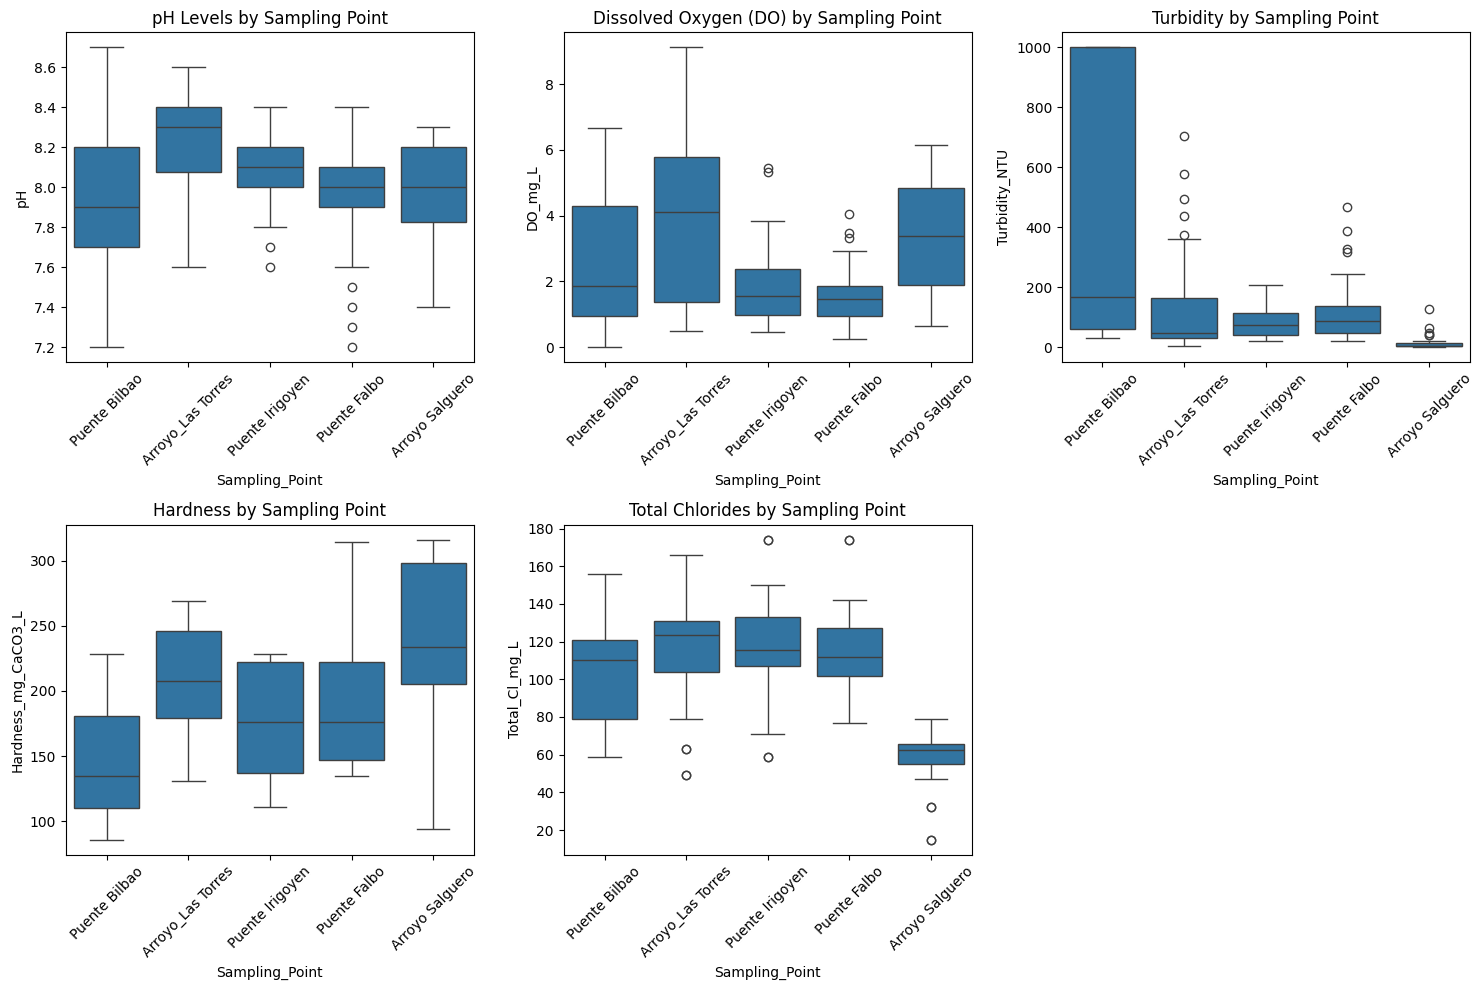

In [ ]:
# Step 1: Boxplots for Key Water Quality Parameters
plt.figure(figsize=(15, 10))

# pH
plt.subplot(2, 3, 1)
sns.boxplot(x='Sampling_Point', y='pH', data=contamination_copy_df)
plt.title('pH Levels by Sampling Point')
plt.xticks(rotation=45)

# Dissolved Oxygen
plt.subplot(2, 3, 2)
sns.boxplot(x='Sampling_Point', y='DO_mg_L', data=contamination_copy_df)
plt.title('Dissolved Oxygen (DO) by Sampling Point')
plt.xticks(rotation=45)

# Turbidity
plt.subplot(2, 3, 3)
sns.boxplot(x='Sampling_Point', y='Turbidity_NTU', data=contamination_copy_df)
plt.title('Turbidity by Sampling Point')
plt.xticks(rotation=45)

# Hardness
plt.subplot(2, 3, 4)
sns.boxplot(x='Sampling_Point', y='Hardness_mg_CaCO3_L', data=contamination_copy_df)
plt.title('Hardness by Sampling Point')
plt.xticks(rotation=45)

# Total Chlorides
plt.subplot(2, 3, 5)
sns.boxplot(x='Sampling_Point', y='Total_Cl_mg_L', data=contamination_copy_df)
plt.title('Total Chlorides by Sampling Point')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


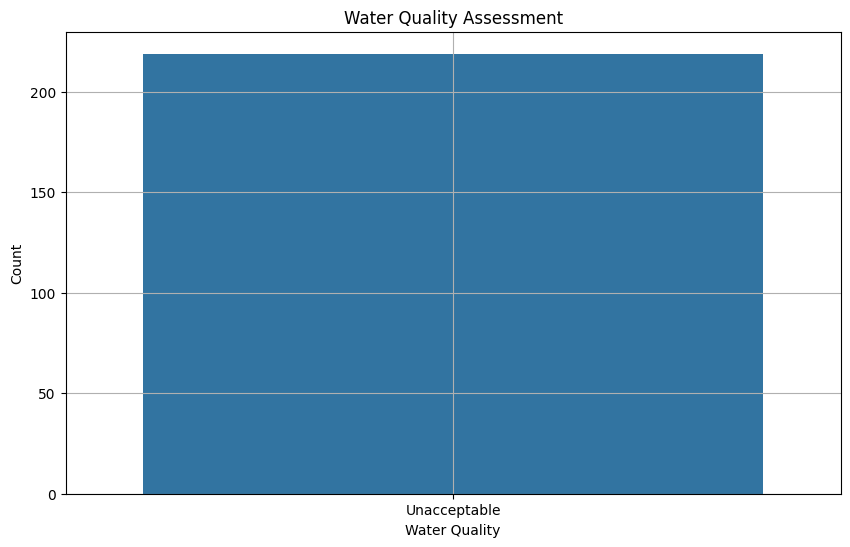

In [ ]:
# Step 1: Define a function for water quality assessment
def assess_water_quality(row):
    if (6.5 <= row['pH'] <= 8.5) and (row['DO_mg_L'] > 6) and (row['Turbidity_NTU'] < 5) and (row['Hardness_mg_CaCO3_L'] <= 75):
        return 'Acceptable'
    else:
        return 'Unacceptable'

# Step 2: Apply the function to create a new column for water quality
contamination_copy_df['Water_Quality'] = contamination_copy_df.apply(assess_water_quality, axis=1)

# Step 3: Visualize the water quality assessment results
plt.figure(figsize=(10, 6))
sns.countplot(x='Water_Quality', data=contamination_copy_df)
plt.title('Water Quality Assessment')
plt.ylabel('Count')
plt.xlabel('Water Quality')
plt.grid()
plt.show()


In [ ]:
from scipy import stats

# Step 1: Select the data for the two sampling points
sample_1 = contamination_copy_df[contamination_copy_df['Sampling_Point'] == 'Puente Bilbao']['pH']
sample_2 = contamination_copy_df[contamination_copy_df['Sampling_Point'] == 'Arroyo_Las Torres']['pH']

# Step 2: Perform the t-test
t_stat, p_value = stats.ttest_ind(sample_1, sample_2, nan_policy='omit')

# Step 3: Print the results
alpha = 0.05  # significance level
if p_value < alpha:
    result = "Reject the null hypothesis: There is a significant difference in pH levels."
else:
    result = "Fail to reject the null hypothesis: No significant difference in pH levels."

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
print(result)


T-statistic: -4.26, P-value: 0.0001
Reject the null hypothesis: There is a significant difference in pH levels.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Define features and target variable
X = contamination_copy_df.drop(columns=['DO_mg_L', 'Date', 'Time', 'Sampling_Point', 'Water_Quality'])
y = contamination_copy_df['DO_mg_L']

# Step 2: Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

# Option 1: Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Option 2: If you want to encode categorical variables instead of dropping
# X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Step 3: Handle missing values if any
X.fillna(X.mean(), inplace=True)  # Replace NaNs with the mean for simplicity

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Non-numeric columns: ['Hardness_Classification', 'Month_Name']


In [ ]:
# Step 1: Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Step 1: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 2: Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Absolute Error: 0.73
R² Score: 0.73


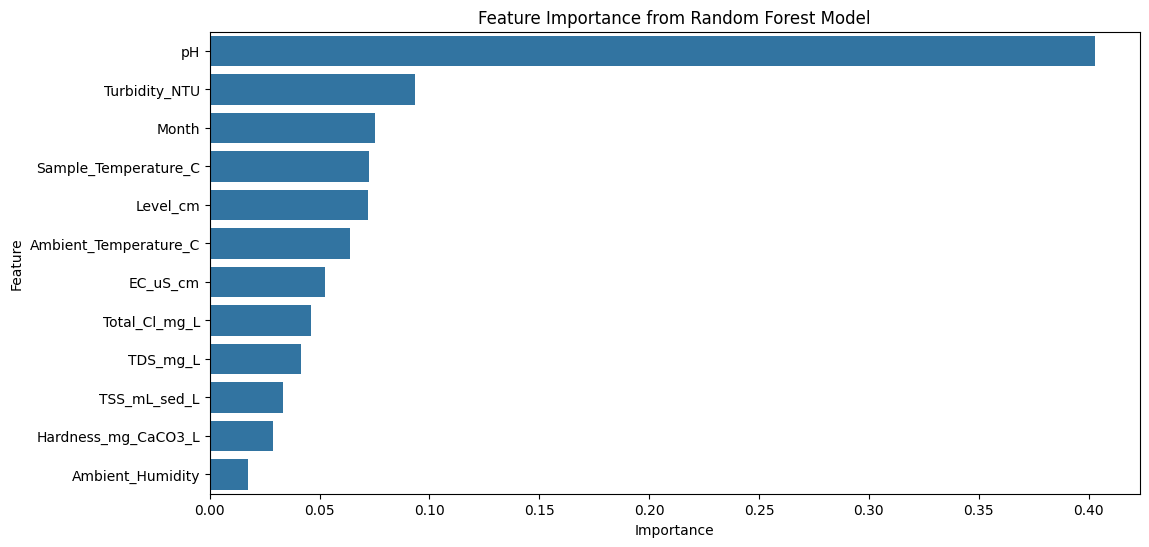

In [ ]:
# Fit the model (assuming RandomForestRegressor is used)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 1: Extract feature importances
importances = model.feature_importances_

# Step 2: Create a list of feature names based on the transformed X
feature_names = X.columns  # If X is a DataFrame, this will work
# If you used np.array or similar to transform X, you can get the names differently.

# Step 3: Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()



---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 0.87
R-squared (R2): 0.73


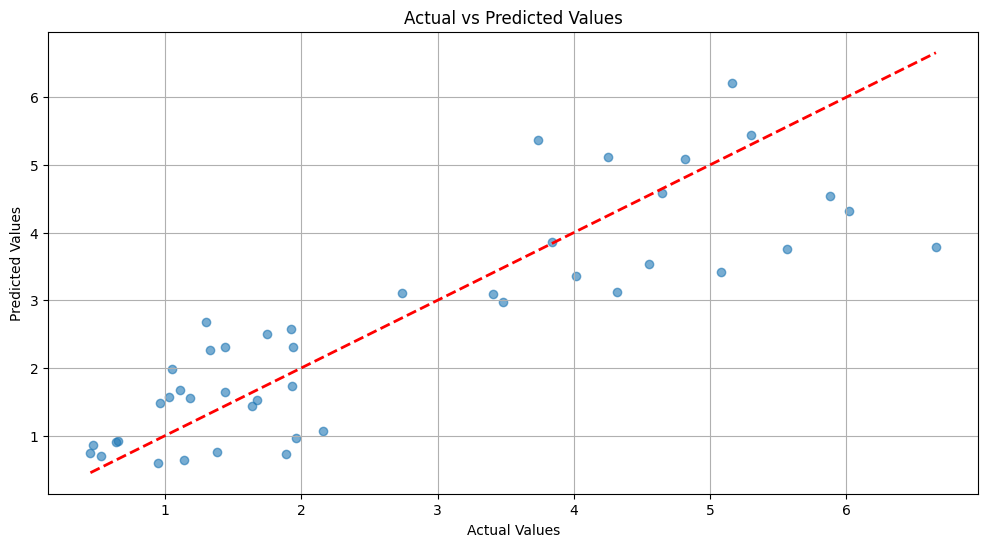

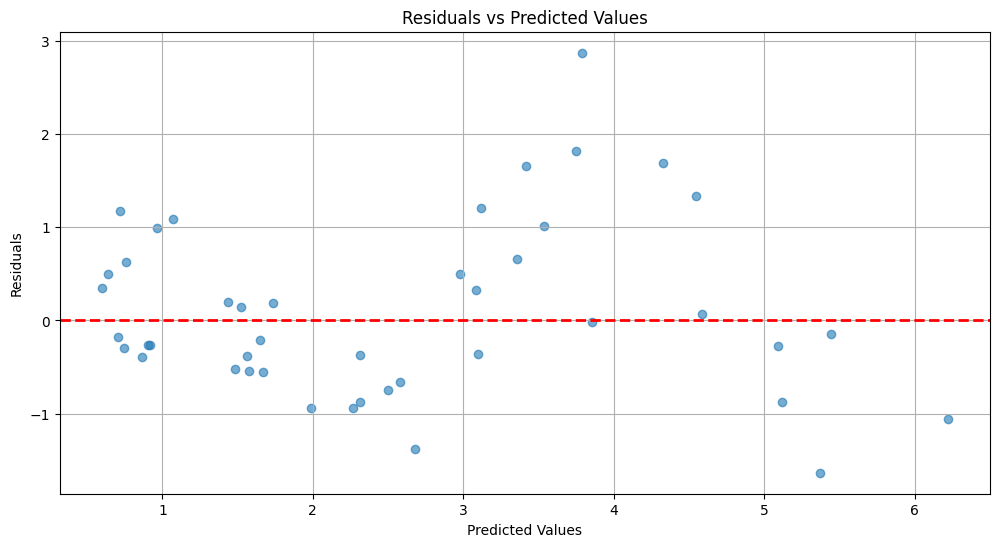

In [ ]:
# Step 1: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 2: Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Step 3: Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

# Optional: Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linewidth=2, linestyle='--')  # Line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid()
plt.show()


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
# Step 1: Import the necessary library
import joblib  # or you can use `import pickle`

# Step 2: Save the model to a file
model_filename = 'water_quality_model.pkl'  # Specify the filename
joblib.dump(model, model_filename)  # Save the model

print(f'Model saved to {model_filename}')


Model saved to water_quality_model.pkl


In [ ]:
# Step 3: Load the model from the file
loaded_model = joblib.load(model_filename)

# You can now use `loaded_model` for predictions


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>


**Summary of Results**

 Our analysis of the contaminated river water parameters yielded several significant findings:

* Water Quality Assessment - The majority of water samples were classified as "Unacceptable" based on our defined criteria for pH, Dissolved Oxygen (DO), Turbidity, and Hardness.

* Parameter Distributions - We observed wide variations in key parameters such as pH (7.2 to 8.7), Dissolved Oxygen (0 to 9.12 mg/L), and Turbidity (1.06 to 1000 NTU).
* Temporal Trends - Seasonal patterns were evident in parameters like Ambient Temperature and Dissolved Oxygen, with notable fluctuations across different months.
* Spatial Variations - Significant differences in water quality parameters were observed across different sampling points, particularly for pH levels between Puente Bilbao and Arroyo_Las Torres (confirmed by t-test, p-value < 0.05).
* Predictive Modeling - Our Random Forest model for predicting Dissolved Oxygen levels achieved an R² score of 0.73, indicating a moderate to good predictive performance.

**Insights Gained**

* Water Quality Concerns: The high proportion of "Unacceptable" water quality samples suggests persistent contamination issues in the studied river system.
Seasonal Influences: The observed monthly patterns in parameters like temperature and DO highlight the importance of considering seasonal factors in water quality management.
* Spatial Heterogeneity: The significant variations across sampling points underscore the need for location-specific water quality management strategies.
Interconnected Parameters: The correlation analysis revealed complex relationships between different water quality parameters, emphasizing the need for a holistic approach to water quality assessment.
* Predictive Capabilities: The moderate success of our DO prediction model suggests potential for developing early warning systems for low oxygen conditions in the river.

**Limitations of the Study**

The study was limited to a single year of data, which may not capture long-term trends or anomalies.
Outliers and Data Quality: Some extreme values were observed, particularly in Turbidity measurements, which could impact the reliability of certain analyses.

Lack of data on external factors such as rainfall, land use changes, or point source pollution events limits our ability to explain some observed patterns.
Model Simplification: The water quality assessment criteria used a simplified approach and may not capture the full complexity of ecological water quality standards.
Predictive Model Limitations: While our DO prediction model showed promise, it still leaves a significant portion of the variance unexplained.

**Suggestions for Future Projects**

Long-term Monitoring: Extend the study over multiple years to capture long-term trends and assess the impact of climate change on river water quality.
Expanded Parameter Set: Include additional parameters such as nutrients (nitrogen, phosphorus), heavy metals, and microbial indicators for a more comprehensive assessment.
Watershed Analysis: Incorporate GIS data to analyze the impact of land use patterns and point source pollution on water quality parameters.
Advanced Modeling Techniques: Explore time series forecasting models or more sophisticated machine learning techniques to improve predictive capabilities.
Ecological Impact Assessment: Conduct studies on aquatic biodiversity in relation to water quality parameters to assess ecological impacts.

---


---
<a href=#ten></a>
## **References**

### References and Sources

1. **Data Source**
   - Ferran, N. (2023). *River Water Parameters*. Kaggle. [Link to Dataset](https://www.kaggle.com/datasets/natanaelferran/river-water-parameters?select=River+water+parameters.csv).

2. **Research Papers and Articles**
   - World Health Organization. (2021). *Guidelines for Drinking-water Quality*. WHO Press.
   - United Nations Environment Programme. (2020). *Global Environment Outlook 6: Healthy Planet, Healthy People*. Cambridge University Press.
   - Zhang, Y., & Wang, D. (2019). "Water quality assessment and pollution sources identification of rivers in Beijing, China." *Environmental Science and Pollution Research*, 26(24), 24664-24676. DOI: [10.1007/s11356-019-06098-7](https://doi.org/10.1007/s11356-019-06098-7).

3. **Documentation for Tools and Libraries**
   - pandas documentation. (2024). Retrieved from [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/).
   - NumPy documentation. (2024). Retrieved from [numpy.org](https://numpy.org/doc/stable/).
   - Matplotlib documentation. (2024). Retrieved from [matplotlib.org](https://matplotlib.org/stable/contents.html).
   - Seaborn documentation. (2024). Retrieved from [seaborn.pydata.org](https://seaborn.pydata.org/).
   - Scikit-learn documentation. (2024). Retrieved from [scikit-learn.org](https://scikit-learn.org/stable/).

4. **Environmental and Water Quality Guidelines**
   - U.S. Environmental Protection Agency. (2023). *Water Quality Standards Handbook*. Retrieved from [epa.gov](https://www.epa.gov/wqs-tech/water-quality-standards-handbook).

5. **Statistical Analysis Resources**
   - Field, A. (2013). *Discovering Statistics Using IBM SPSS Statistics*. SAGE Publications Ltd.


## Additional Sections to Consider

* ### Appendix:
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors:
If this is a group project, list the contributors and their roles or contributions to the project.
